# Image classification on the MNIST data set using convolutional neural networks

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.data import Dataset, experimental
from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session() # Reset notebook state

We're using MNIST, a database of hand-written digits commonly used for training and testing image processing and machine learning techniques. The database is split into 60,000 training examples and 10,000 test examples. The digits are stored as 28-pixel 8-bit grayscale images. For each digit, a numerical label of 0-9 is provided.

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

First, let's visualise some of the training data.

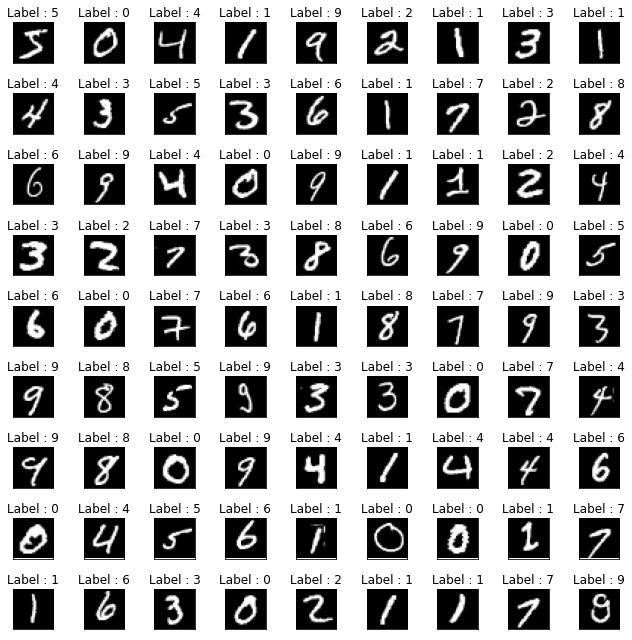

In [3]:
fig, axes = plt.subplots(9,9,figsize=(9,9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label : {y_train[i]}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout()

In Keras, 2D convolutional layers take 3D tensors with dimensions (height, width, channels) as input. Since our images are grayscale, the input data has only a single channel,. We reshape the training data into 3D tensors, and convert the 8-bit integer values to floats.

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train, x_test = x_train / 255.0, x_test / 255.0

# Building a CNN using the Keras API

The Sequential model allows us to build up our neural network's architecture by chaining together layers. This is a good place to get started with Keras, and covers the majority of real-world use cases.

In [5]:
model = Sequential()

We first use a series of convolution and pooling layers to extract features from the images. Let's add one of each to the model.

In [6]:
conv1 = Conv2D(filters=32, kernel_size=[5, 5], padding='same', activation='relu', input_shape=(28, 28, 1))
pool1 = MaxPooling2D(pool_size=[2, 2])
model.add(conv1)
model.add(pool1)

We can inspect the architecture of our model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


The output of every conv2d and max_pooling2d layer is a 3D tensor of shape (height, width, channels). By applying pooling layers between convolutional layers, we can reduce the width and height as we go deeper in the network. Since smaller images are computationally cheaper to process, we can afford to use more output channels in subsequent convolutional layers. Let's add another convolution with more output channels, along with another pooling layer.

In [8]:
conv2 = Conv2D(filters=64, kernel_size=[5, 5], padding='same', activation='relu')
pool2 = MaxPooling2D(pool_size=[2, 2])
model.add(conv2)
model.add(pool2)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


To use the output from the convolutional layers to perform the classification, we feed the output into one or more dense layers. We first flatten the output to create a 1D input layer, then add dense layers on top. MNIST has ten classes, the digits 0-9, so we use a final dense layer with ten outputs and a softmax activation to perform the classification.

In [10]:
flat = Flatten()
dense1 = Dense(units=64, activation='relu')
dense2 = Dense(units=10, activation='softmax')
model.add(flat)
model.add(dense1)
model.add(dense2)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

Finally, we need to specify the training strategy.

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Here's a helper function to create a new instance of the model.

In [17]:
def get_new_model():
    clear_session() # Free up memory
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=[5, 5], padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    model.add(Conv2D(filters=64, kernel_size=[5, 5], padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=[2, 2]))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

Let's look at the final architecture of out model.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# Training and evaluating the model

Finally, we can train our model. For each training epoch, TensorFlow reports training progress and accuracy during the training process.

In [19]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 55s 29ms/step - loss: 0.1244 - accuracy: 0.9615


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0390 - accuracy: 0.9873


[0.03896239399909973, 0.9872999787330627]

We can continue training this model for additional epochs if needed.

In [ ]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1499/1875 [======================>.......] - ETA: 11s - loss: 0.0417 - accuracy: 0.9872

In [ ]:
model.evaluate(x_test, y_test)

# Batch training

We can use TensorFlow datasets to shuffle our data and control how it is split into batches for training.

In [ ]:
BATCH_SIZE = 64
AUTOTUNE = experimental.AUTOTUNE
BUFFER_SIZE = len(y_train)

ds = Dataset.from_tensor_slices((x_train, y_train))
ds = ds.shuffle(buffer_size=len(y_train))
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)

We set the buffer size equal to the size of the data set so that the entire data set is fully shuffled. Using a smaller batch size reduces memory requirements but results in worse randomisation. The buffer is filled before any items are taken from it, so a large buffer can cause a delay when beginning the dataset.

In [ ]:
model = get_new_model()

Let's see how the model improves as more training data are used. Here we train for 20 epochs. At each step of the epoch, the next batch of training data is used to further train the model. Training set accuracy and training loss is reported at the end of each epoch.

In [ ]:
model.fit(ds, epochs=20, steps_per_epoch=10)

Finally, let's see how the model performs on the test set.

In [ ]:
model.evaluate(x_test, y_test)

What if we continue training for another 20 epochs?

In [ ]:
print('Training:')
model.fit(ds, epochs=20, steps_per_epoch=10)
print('Test:')
model.evaluate(x_test, y_test)

We can keep training as long as we like. When all training examples have been used, the buffer will be refilled with a random shuffling of the training data and training batches will continue to be taken from the buffer.

In [ ]:
print('Training:')
model.fit(ds, epochs=20, steps_per_epoch=10)
print('Test:')
model.evaluate(x_test, y_test)